# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
from collections import Counter
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline 


def visualize(X, y):
    '''Represent an image per each class of sign and its label'''
    fig = plt.figure(1)
    #fig.suptitle(title, y=1.08, fontsize=14, fontweight='bold')
    fig.set_size_inches(18.5, 30)
    classes, indices = np.unique(y_train, return_index=True)   
    
    num_cols = 5
    k = len(classes)
    
    num_rows = k//num_cols
    if (k%num_cols != 0):
        num_rows += 1
 
    count = 0
      
    for i in indices:
        count += 1
        plt.subplot(num_rows, num_cols, count)
        if (X.shape[3] == 1):
            plt.imshow(X[i,:,:,0],cmap = 'gray')
        else:
            plt.imshow(X[i])
        plt.title(y[i],fontsize=20)
  

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
    plt.rc('font', size=10) 
    
def plot_number_of_occurrencies(data):
    '''Represent a bar chart in which each bar stands for a class 
    and its height show how many images of this class are in the dataset'''
    c = Counter(data)

    plt.bar(c.keys(), c.values())
    plt.show()
   

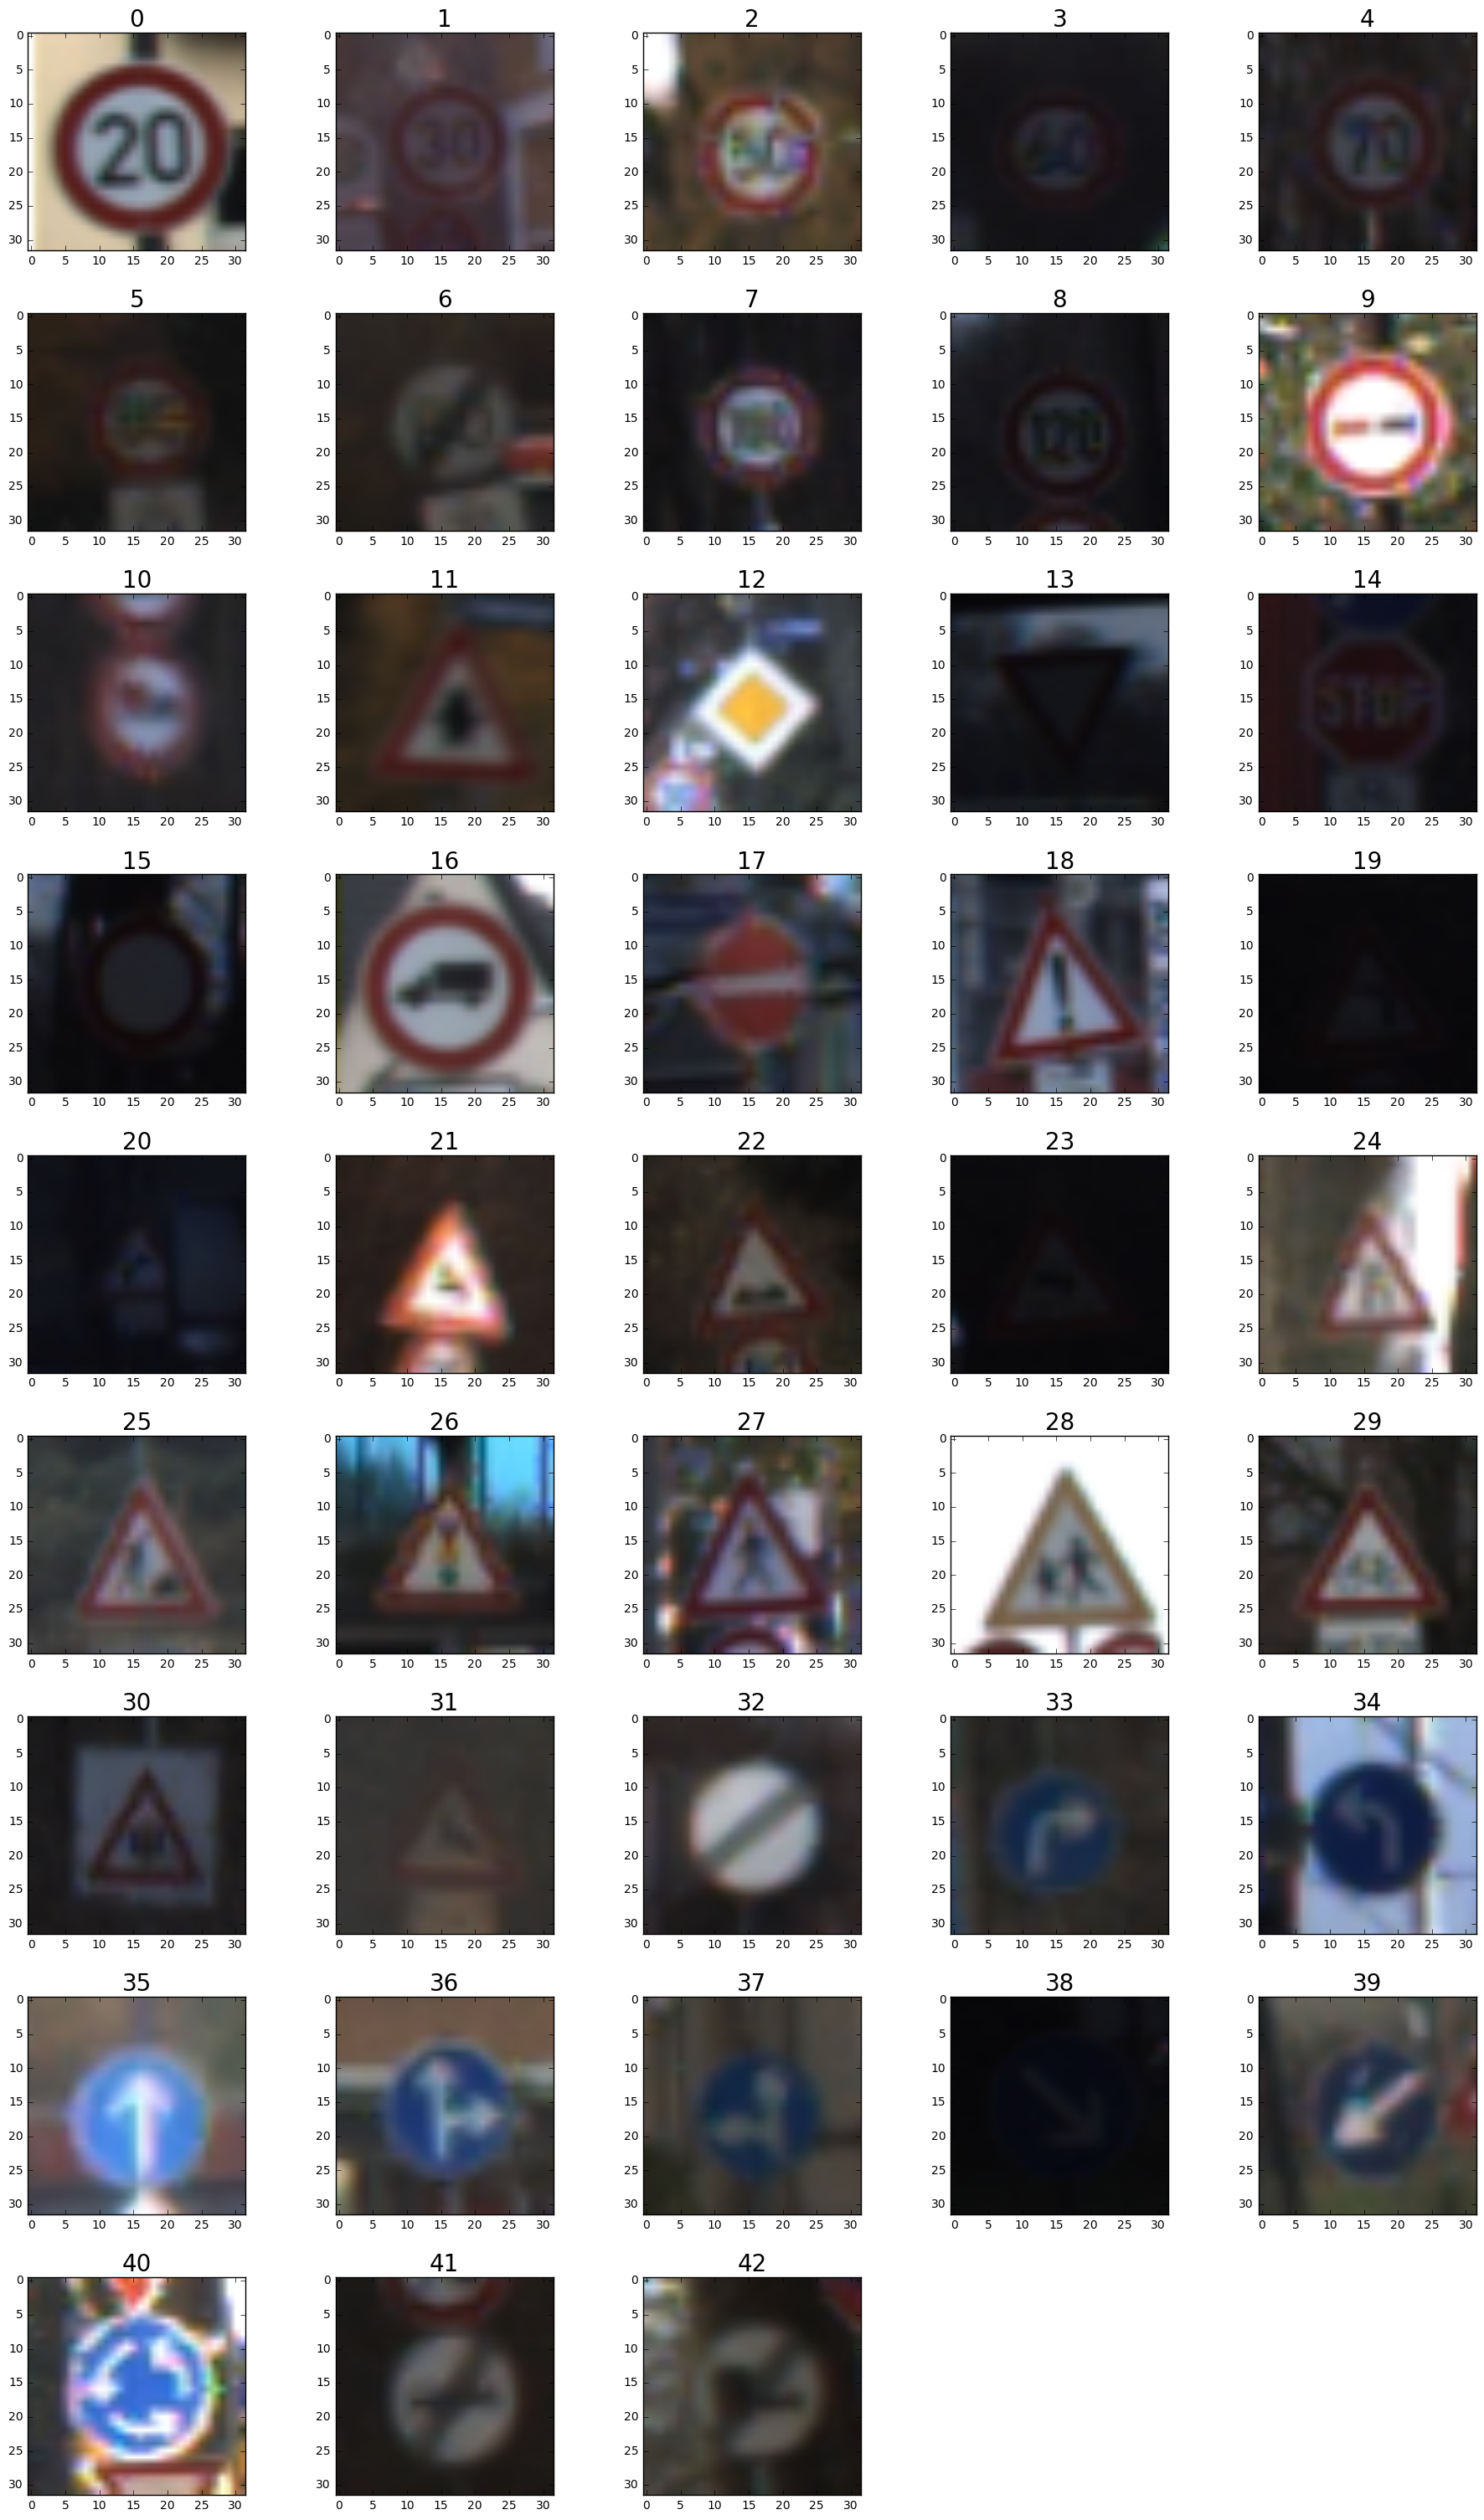

In [4]:
#Visualize an image per each sign
visualize(X_train, y_train)

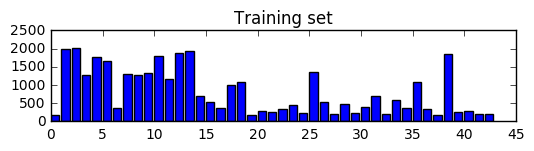

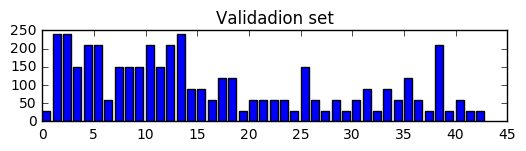

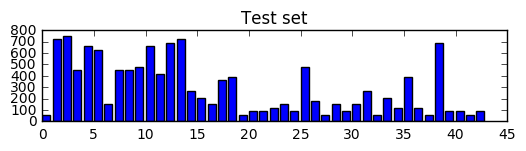

In [5]:
#Represent number of occurrencies
plt.figure(1)
plt.subplot(311)
plt.title('Training set')
plot_number_of_occurrencies(y_train)
plt.subplot(312)
plt.title('Validadion set')
plot_number_of_occurrencies(y_valid)
plt.subplot(313)
plt.title('Test set')
plot_number_of_occurrencies(y_test)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [6]:
#Define preprocessing functions
import cv2
import numpy as np
from numpy import newaxis
import scipy.ndimage
import random


def randrange_float(start, stop, step):
    '''Returns a random float number between start and stop'''
    return random.randint(0, int((stop - start) / step)) * step + start

def augment_data(X,y):
    '''Taking into account the maximum number of occurrencies in the data set, this
    function augments the number of occurrencies of each image up to the maximum rotating the 
    original images randomly'''
    #Calculate number of different classes and number of occurrencies of each class 
    unique, counts = np.unique(y, return_counts=True)
    #Maximum number of occurrencies
    max_counts = max(counts)    
    
    for i in range(len(unique)):        
        #How many images we have to create
        z = max_counts - counts[i]
        
        new_features = []
        new_labels = []
        #Create a mask with the indices where the data set have images of the class unique[i](=i)
        mask = np.where(y == i)
        
        if z != 0:
            for j in range(z):
                #Choose the angle of rotation randomly
                angle = randrange_float(-20, 20, 0.5)
                #Choose one image of those which belong to this class (mask)
                image = random.choice (X[mask])
                #rotate the original image 
                new_features.append(scipy.ndimage.rotate(image, angle, reshape=False))
                #create the new label for the new image
                new_labels.append(i)

            #Append new labels and new images to the original dataset
            X = np.append(X, np.array(new_features), axis=0)
            y = np.append(y, np.array(new_labels), axis=0)
    
    return X, y


def normalize(image_data):
    '''Returns the dataset in which the images have been normalized'''
    a = 0.1
    b = 0.9
    current_min = 0
    current_max = 255
    return a + ( ( (image_data - current_min)*(b - a) )/( current_max - current_min ) )



In [7]:
#Augment and shuffle training data
from sklearn.utils import shuffle

#Normalize images from all the datasets: train, validation and test
X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

#Augment the data of the training set in order to have uniform distribution of occurrencies
X_train, y_train = augment_data(X_train, y_train)

#Shuffle the data
X_train, y_train = shuffle(X_train, y_train)

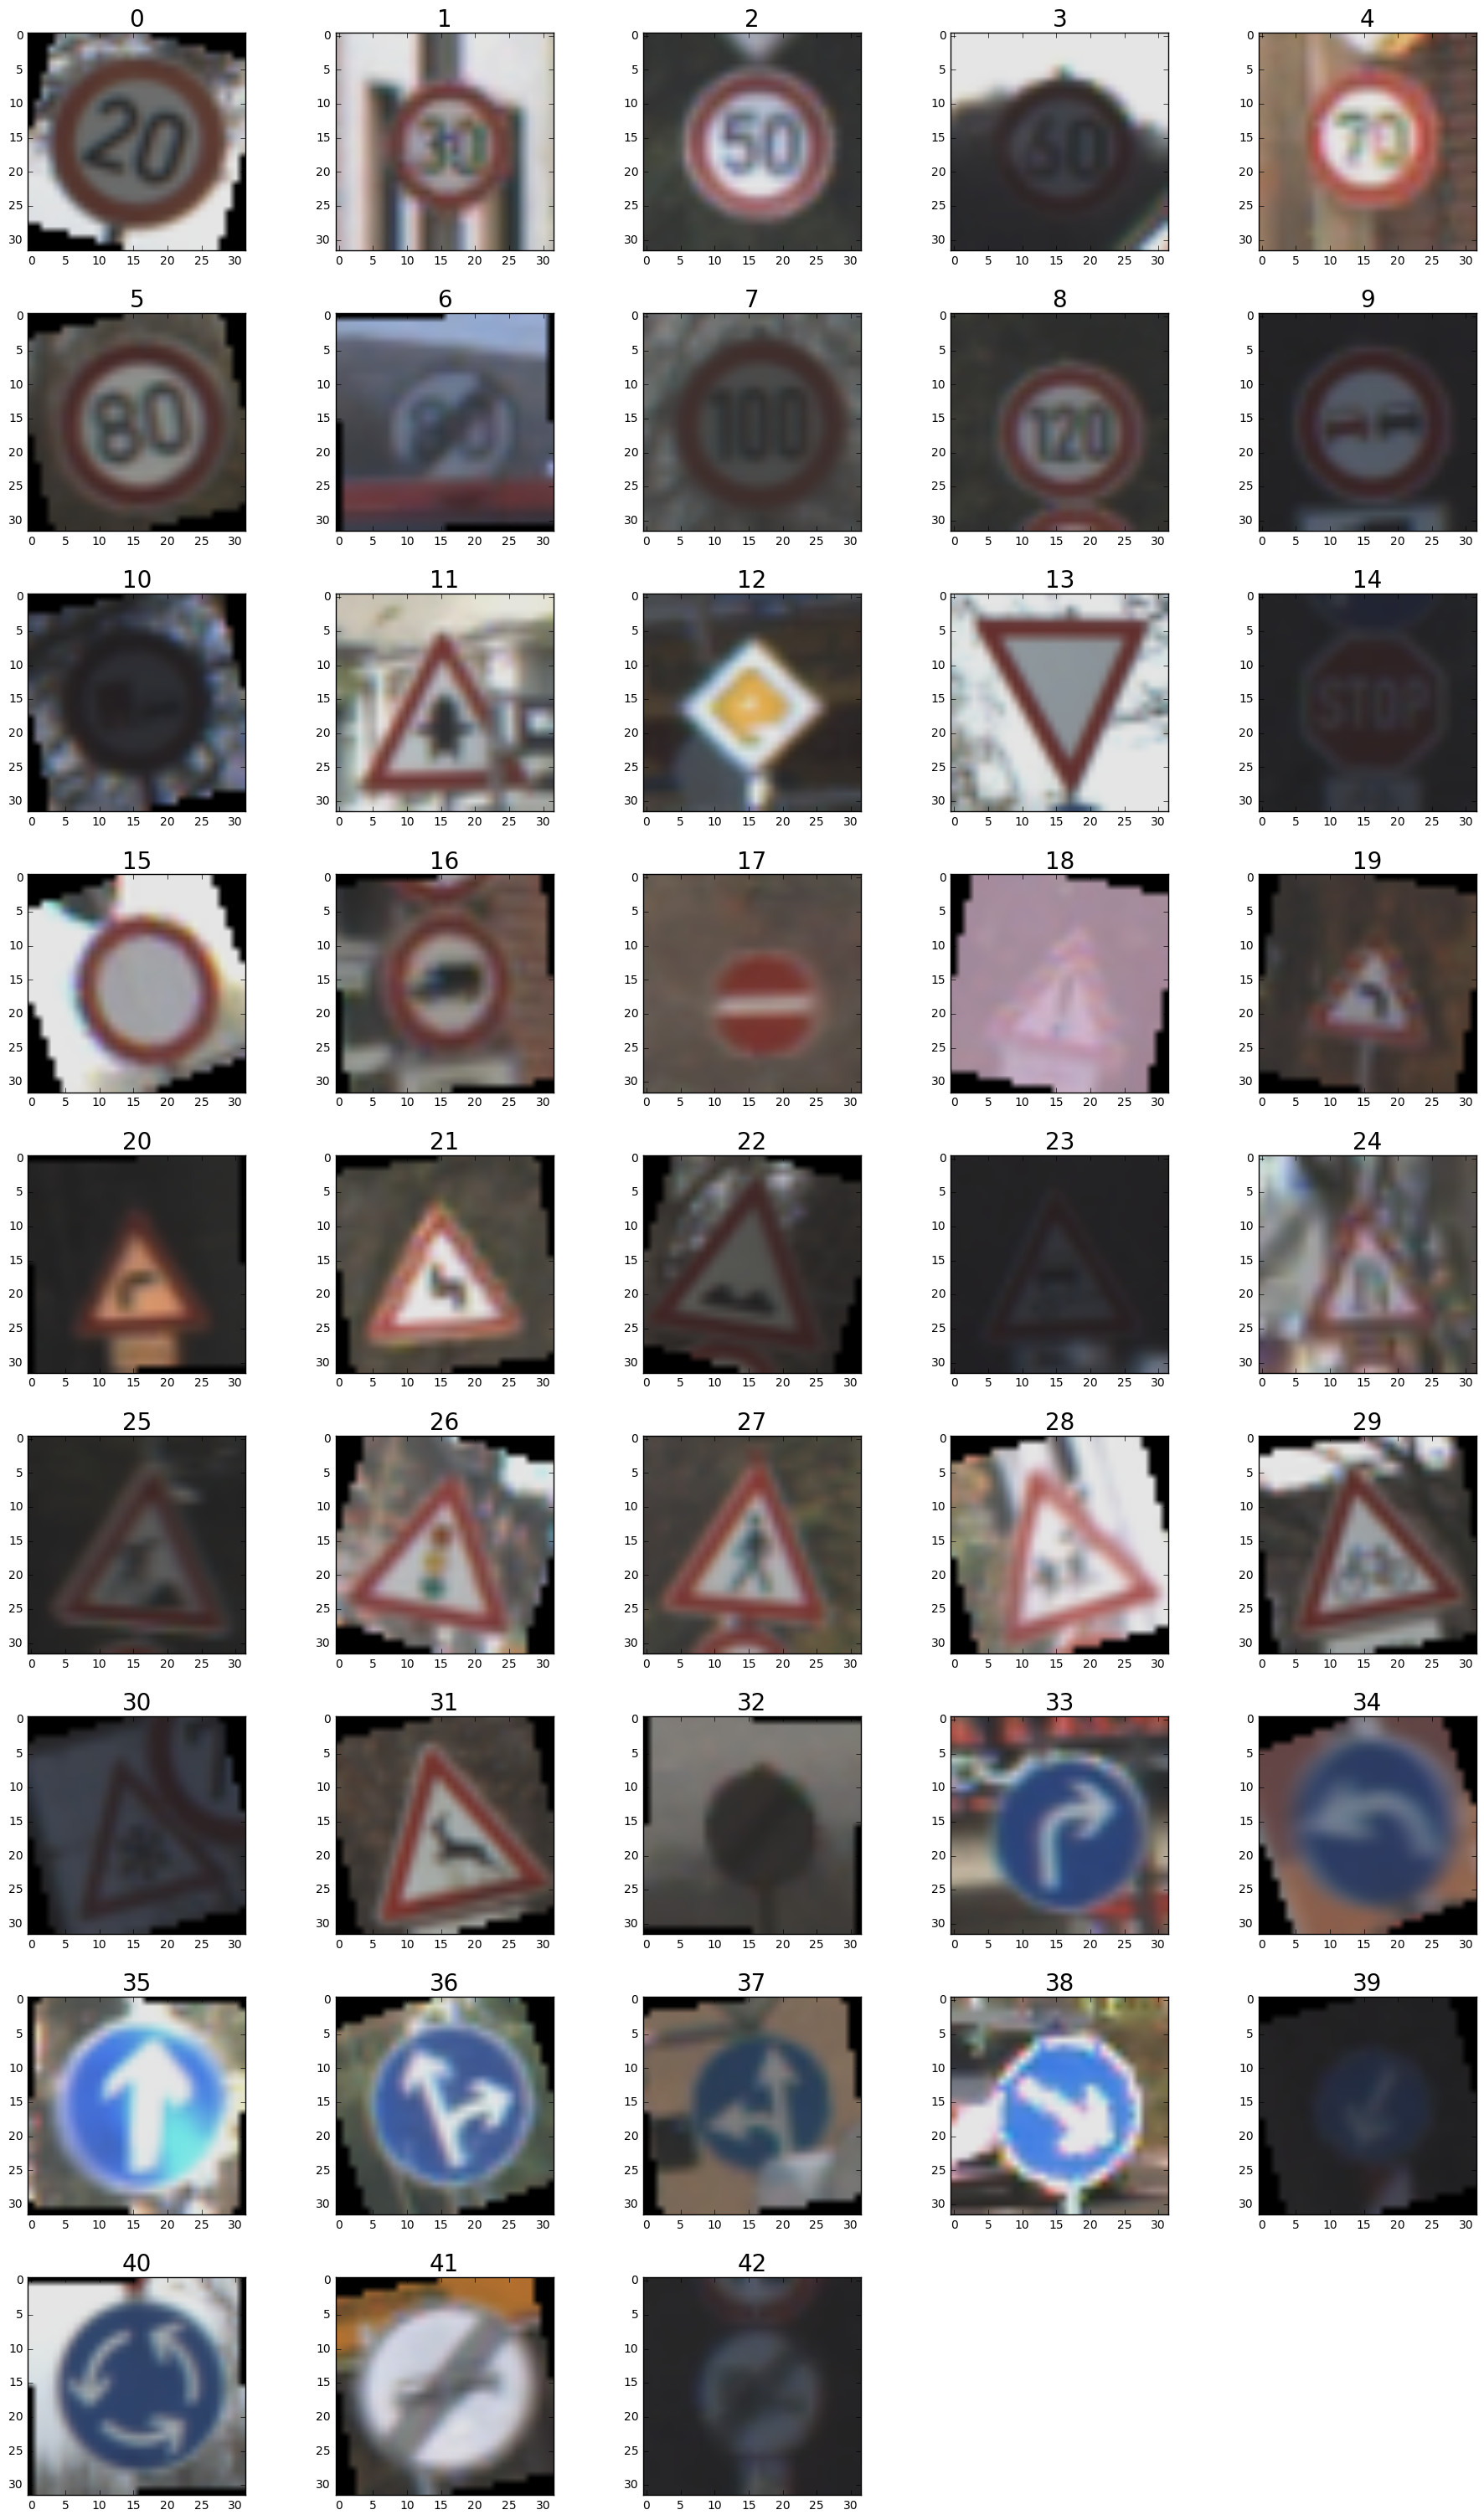

In [8]:
#Visualize the normalized images
visualize(X_train,y_train)

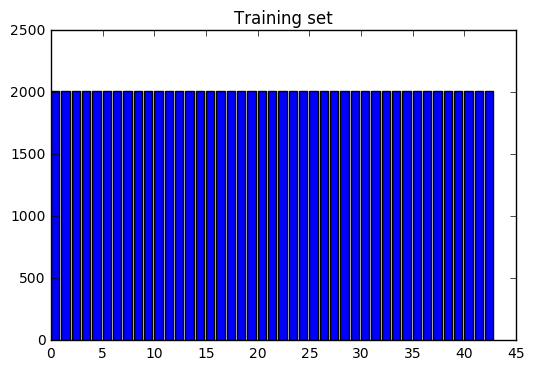

In [10]:
#Check number of occurrencies of the training set after augmenting data--Uniform distribution
#plt.title('Training set')
#plot_number_of_occurrencies(y_train)

plt.title('Training set')
plot_number_of_occurrencies(y_train)


### Model Architecture

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

#Define epochs and batch size
EPOCHS = 100
BATCH_SIZE = 128

In [12]:
from tensorflow.contrib.layers import flatten

def LeNet(x):

    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x32.
    conv1_W = tf.Variable(tf.truncated_normal((5, 5, 3, 32), mean = mu, stddev = sigma)) #(height, width, input_depth, output_depth)
    conv1_b = tf.Variable(tf.zeros(32))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, conv1_b)
     
    # RELU Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1] , padding ='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal((5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, conv2_b)
    
    # RELU Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1] , strides = [1, 2, 2, 1], padding ='VALID')
    
    # Flatten. Input = 5x5x64. Output = 1600.   
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 1600. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal((1600, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.add(tf.matmul(fc0, fc1_W), fc1_b)
       
    # RELU Activation.
    fc1 = tf.nn.relu(fc1)

    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal((120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.add(tf.matmul(fc1, fc2_W), fc2_b)
    
    # RELU Activation.
    fc2 = tf.nn.relu(fc2)
    
    #Add dropout to prevent overfitting
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W = tf.Variable(tf.truncated_normal((84, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(fc2, fc3_W), fc3_b)
   
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [13]:
#Define placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)

with tf.device('/cpu:0'):
    one_hot_y = tf.one_hot(y, 43)


Training pipeline

In [14]:
#define learning rate
rate = 0.001

with tf.device('/gpu:0'):
    logits = LeNet(x)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)

Evaluation

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Train the model

In [16]:
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    #saver.restore(sess, './lenet2')
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet3')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.848

EPOCH 2 ...
Validation Accuracy = 0.930

EPOCH 3 ...
Validation Accuracy = 0.934

EPOCH 4 ...
Validation Accuracy = 0.939

EPOCH 5 ...
Validation Accuracy = 0.946

EPOCH 6 ...
Validation Accuracy = 0.944

EPOCH 7 ...
Validation Accuracy = 0.959

EPOCH 8 ...
Validation Accuracy = 0.960

EPOCH 9 ...
Validation Accuracy = 0.962

EPOCH 10 ...
Validation Accuracy = 0.966

EPOCH 11 ...
Validation Accuracy = 0.969

EPOCH 12 ...
Validation Accuracy = 0.968

EPOCH 13 ...
Validation Accuracy = 0.968

EPOCH 14 ...
Validation Accuracy = 0.967

EPOCH 15 ...
Validation Accuracy = 0.968

EPOCH 16 ...
Validation Accuracy = 0.966

EPOCH 17 ...
Validation Accuracy = 0.970

EPOCH 18 ...
Validation Accuracy = 0.970

EPOCH 19 ...
Validation Accuracy = 0.965

EPOCH 20 ...
Validation Accuracy = 0.970

EPOCH 21 ...
Validation Accuracy = 0.963

EPOCH 22 ...
Validation Accuracy = 0.967

EPOCH 23 ...
Validation Accuracy = 0.969

EPOCH 24 ...
Validation Accura

Evaluate the model with the test set

In [17]:
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    saver.restore(sess,'./lenet3')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.960


In [27]:
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    saver.restore(sess,'./lenet3')

    test_accuracy = evaluate(X_train, y_train)
    print("Training Accuracy = {:.3f}".format(test_accuracy))

Training Accuracy = 1.000


In [18]:
#Calculate the predictions for the test set to represent the confusion matrix
test_pred = tf.nn.softmax(logits)

with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    saver.restore(sess,'./lenet3')
    num_examples = len(X_test)
    preds = []
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_test[offset:offset+BATCH_SIZE]
        test_preds = sess.run(test_pred, feed_dict={x: batch_x,  keep_prob: 1.0})
        test_preds = [np.argmax(row) for row in test_preds]
        preds.append(test_preds)
        
        
    #flatten
    preds = sum(preds, [])
    
    

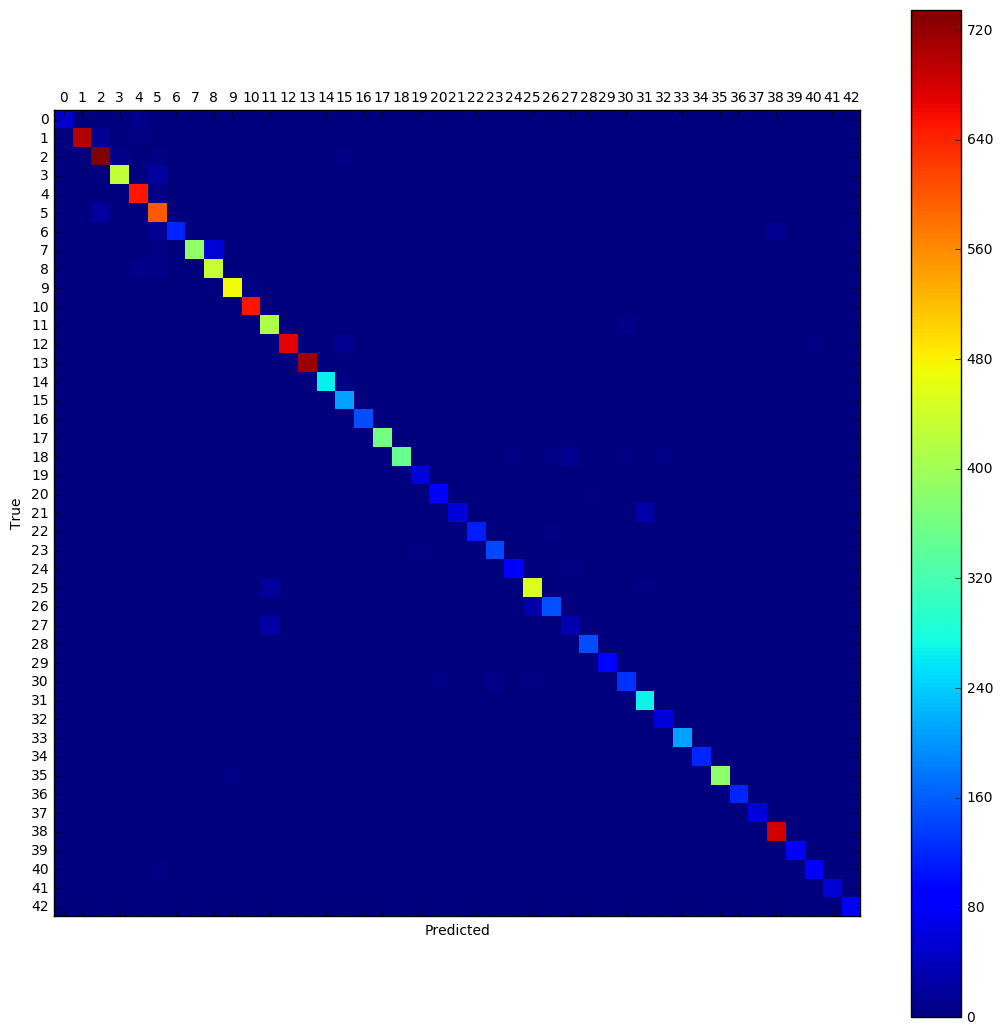

In [19]:
from pylab import rcParams
from sklearn.metrics import confusion_matrix

#Represent the confusion matrix
cm = confusion_matrix(y_test, preds)
n_classes=43
plt.figure(figsize=(40,40))
rcParams['figure.figsize'] = 13, 13
plt.matshow(cm)
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, range(n_classes))
plt.yticks(tick_marks, range(n_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

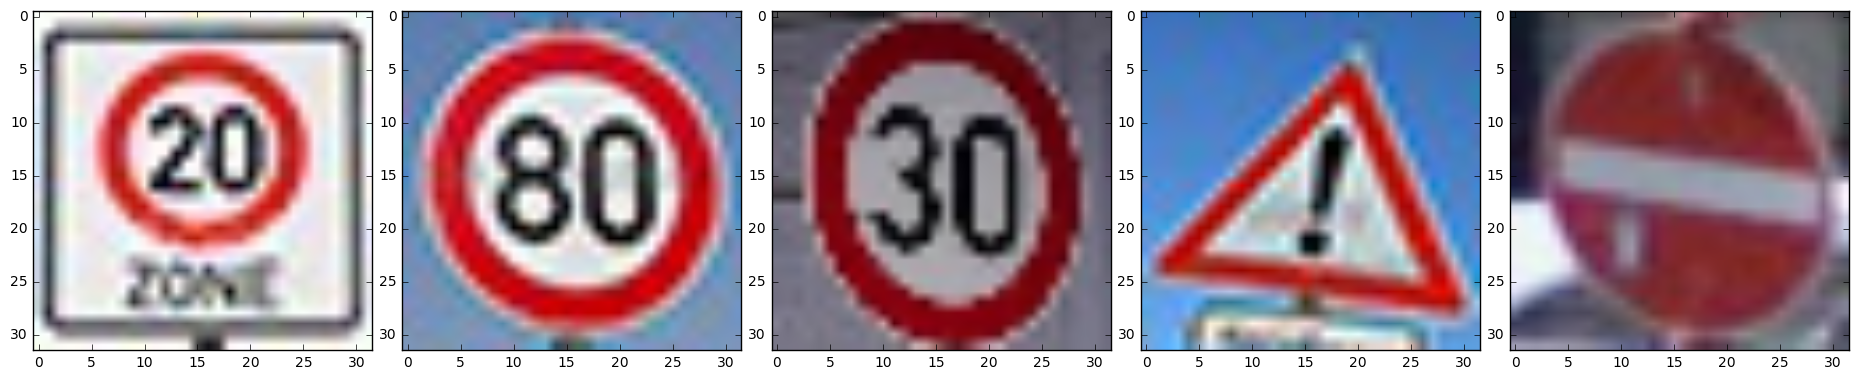

In [20]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
%matplotlib inline 

def display_images(images):
    '''function to plot images'''
    fig = plt.figure(1)
    #fig.suptitle(title, y=1.08, fontsize=14, fontweight='bold')
    fig.set_size_inches(18.5, 30)
      
    
    num_cols = 5
    k = len(images)
    
    num_rows = k//num_cols
    if (k%num_cols != 0):
        num_rows += 1
 
    count = 0
      
    for i in images:
        count += 1
        plt.subplot(num_rows, num_cols, count)
        plt.imshow(i)
     
  

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
    plt.rc('font', size=10) 

def read_images(paths):
    '''Read images from paths. Return an array with images with shape 32x32'''
    images = [] 
    new_size=32

    for imgname in paths:
        #read images
        img=mpimg.imread('images/'+ imgname)
        #resize images to 32x32
        img= cv2.resize(img,(new_size,new_size))
        images.append(img)
    
    images = np.array(images)
    
    return images    
       

#Create a list with the names of the images
paths = ['20.jpg', '80.jpg', '30.jpg', 'exclamation.jpg', 'sign5.jpg']

#Load images from file
images = read_images(paths)
#Dislay images
display_images(images)




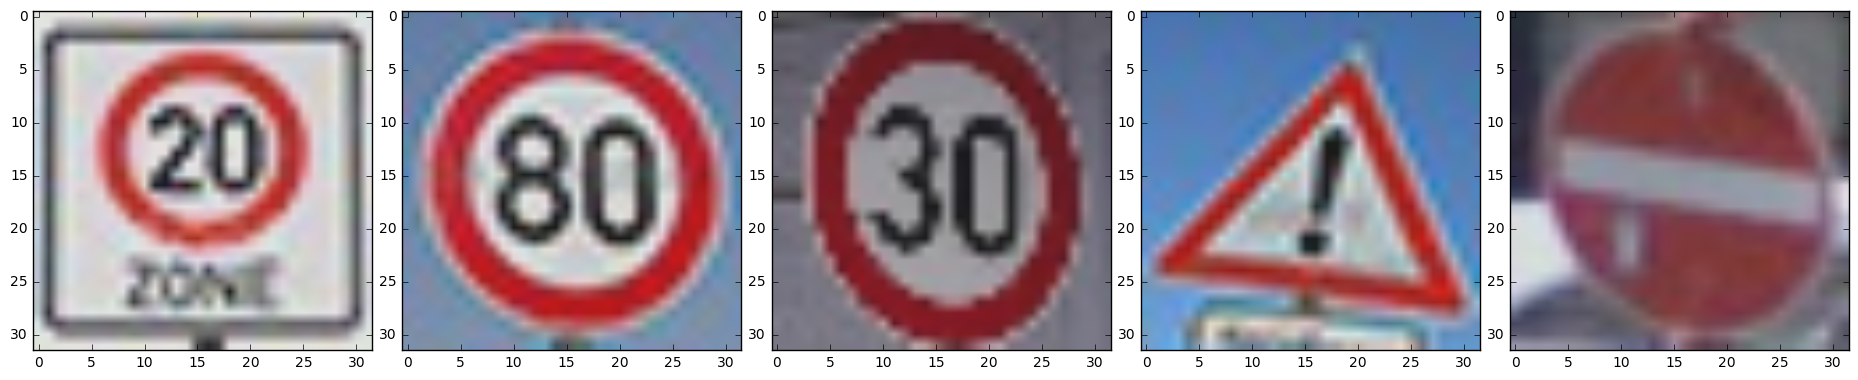

In [21]:
#Preprocess the images normalizing them
images = normalize(images)
#Display normalized images
display_images(images)


In [22]:
#Define X dataset
x_collected = images
#Define y dataset (labels for images in X dataset)
y_collected_true = np.array([0, 5, 1, 18, 17])


### Predict the Sign Type for Each Image

In [23]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import tensorflow as tf

with tf.device('/gpu:0'):
    new_pred = tf.nn.softmax(logits)


with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    saver.restore(sess,'./lenet3')
    
    test_preds = sess.run(new_pred, feed_dict={x: x_collected,  keep_prob: 1.0})
    top_k_preds = sess.run(tf.nn.top_k(test_preds , k=5))
    
    print([np.argmax(row) for row in test_preds])


[5, 5, 1, 18, 17]


### Analyze Performance

In [24]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    saver.restore(sess,'./lenet3')

    test_accuracy = evaluate(x_collected, y_collected_true)
    print("Accuracy = {:.3f}".format(test_accuracy))

Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [25]:
print (top_k_preds)

TopKV2(values=array([[  1.00000000e+00,   9.86375781e-09,   2.02118722e-09,
          2.12283160e-14,   1.81136115e-14],
       [  1.00000000e+00,   5.17879925e-15,   5.32493416e-44,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]], dtype=float32), indices=array([[ 5,  8,  3,  1, 14],
       [ 5,  3,  2,  0,  1],
       [ 1,  0,  2,  3,  4],
       [18,  0,  1,  2,  3],
       [17,  0,  1,  2,  3]]))


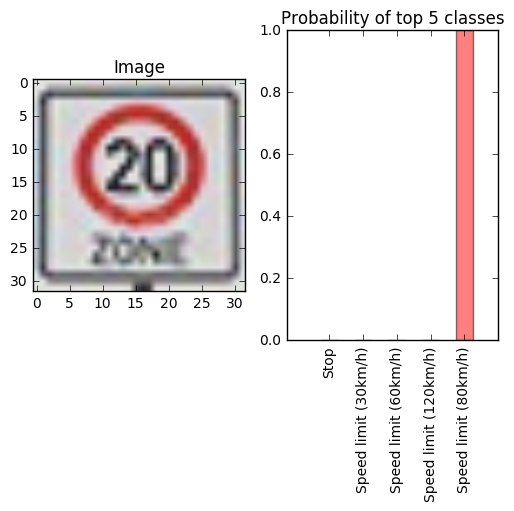

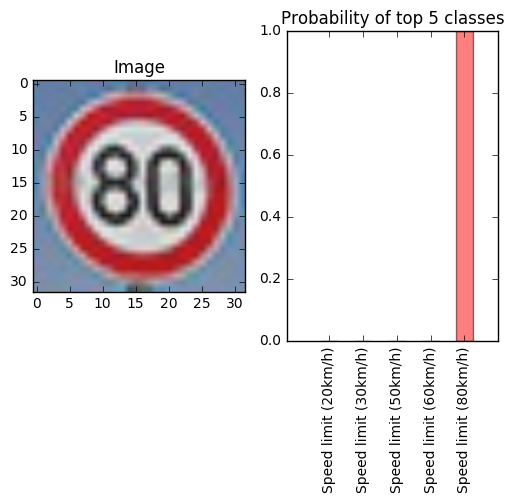

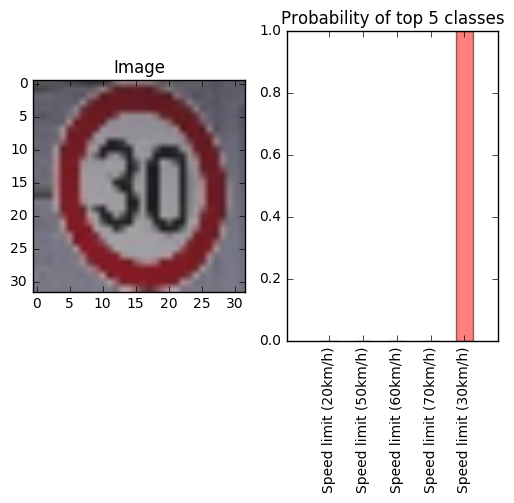

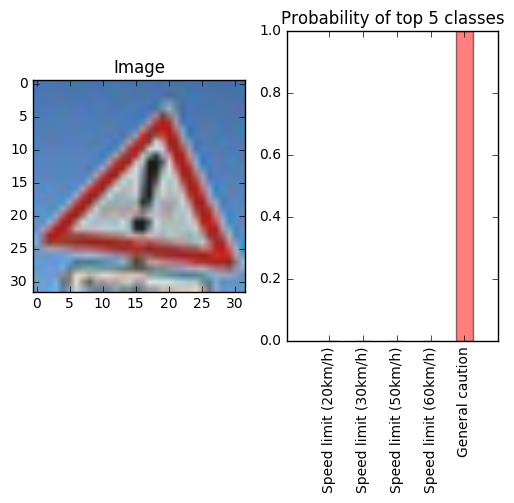

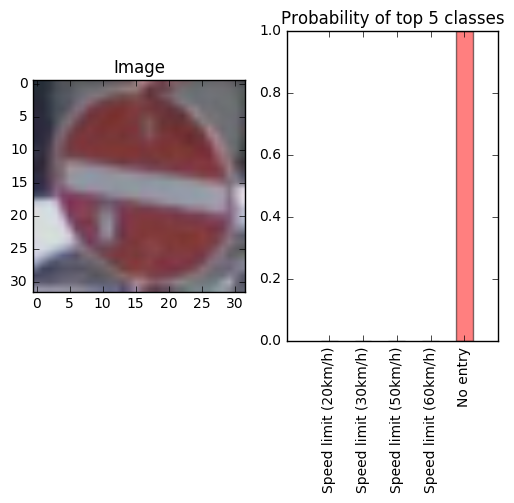

In [26]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import pandas as pd
import pandas as pd

sign_names = pd.read_csv('signnames.csv')

def get_sign_name(class_index):
    row = sign_names[sign_names.ClassId == int(class_index)]
    return row.SignName.values[0]

def get_sign_names(indices):
    return [get_sign_name(index) for index in indices]

#Plot each image with a bar chart showing the probabilites assigned to the top 5 predictions
for i, image in enumerate(images):
    # Plot the original image
    plt.subplot(121);
    plt.imshow(image);
    plt.title('Image');
    
    # Get the top k probabilities and the classes to which they correspond
    indices = top_k_preds.indices[i]   
    values = top_k_preds.values[i]

    # Sort in ascending order
    idx = values.argsort()
    values = values[idx]
    indices = indices[idx]

    # Show a bar chart of the probabilities
    y_pos = range(0, 200, 40)
    
    plt.subplot(122)
    plt.bar(y_pos, values, align='center', alpha=0.5, color='red', width=20)
    
    plt.xticks(y_pos, get_sign_names(indices))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)

    
    plt.title('Probability of top 5 classes')
    plt.show()

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 